# Box Plot With Express

## From DataFrame

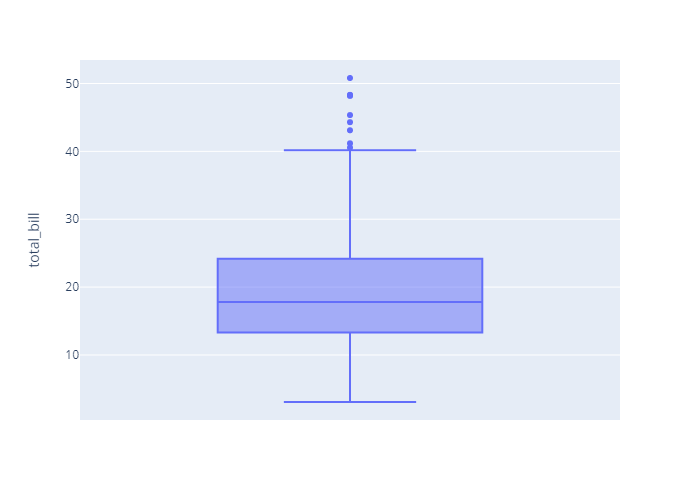

In [2]:
import plotly.express as px
px.box(px.data.tips(), y="total_bill")

## Multiple

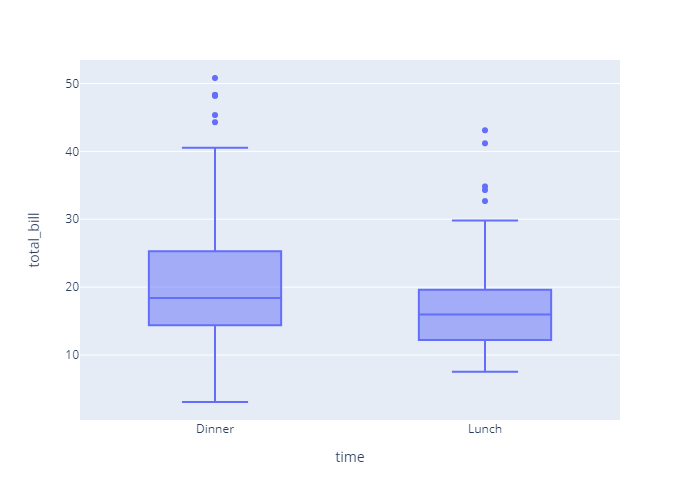

In [3]:
import plotly.express as px
px.box(px.data.tips(), x="time", y="total_bill")

## Displaying points

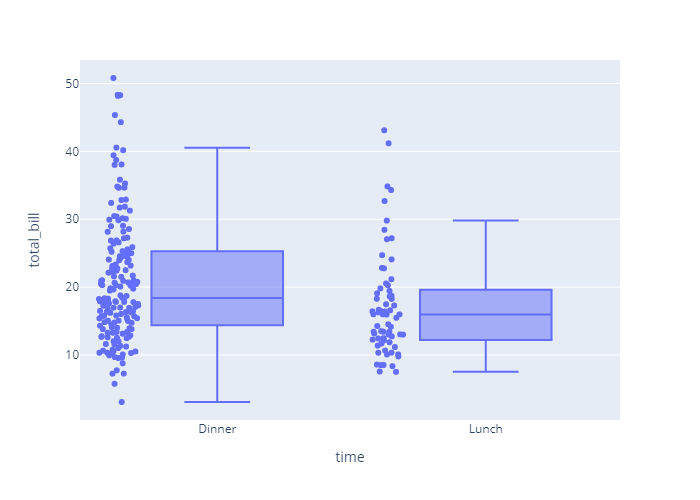

In [4]:
import plotly.express as px
px.box(px.data.tips(), x="time", y="total_bill", points="all")

## Choosing The Algorithm For Computing Quartiles

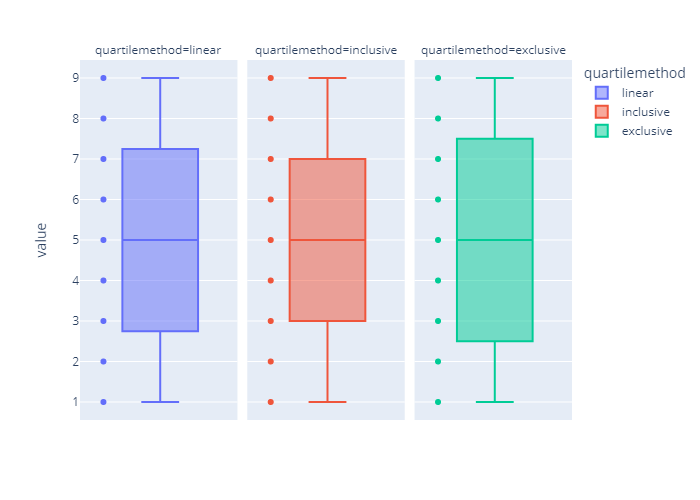

In [5]:
import plotly.express as px
import pandas as pd

data = [1,2,3,4,5,6,7,8,9]
df = pd.DataFrame(dict(
    linear=data,
    inclusive=data,
    exclusive=data
)).melt(var_name="quartilemethod")


fig = px.box(df, y="value", facet_col="quartilemethod", color="quartilemethod",
             boxmode="overlay", points='all')

fig.update_traces(quartilemethod="linear", jitter=0, col=1)
fig.update_traces(quartilemethod="inclusive", jitter=0, col=2)
fig.update_traces(quartilemethod="exclusive", jitter=0, col=3)

fig

## Adding Notches

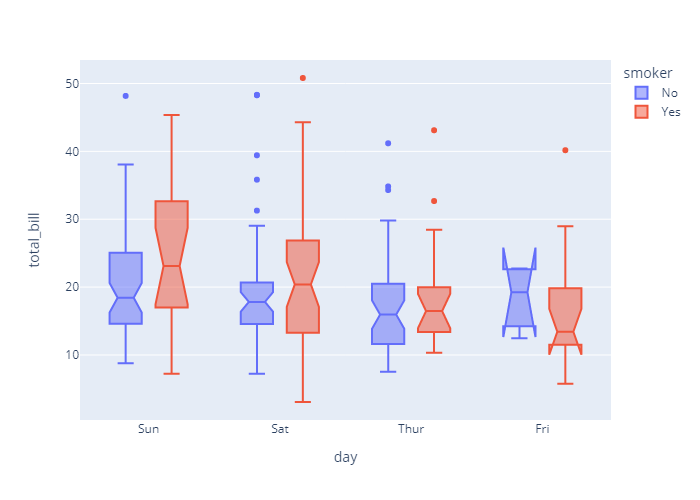

In [6]:
import plotly.express as px
px.box(px.data.tips(), x="day", y="total_bill", color="smoker", notched=True)

## Showing Only Points
Use strip chart instead of box

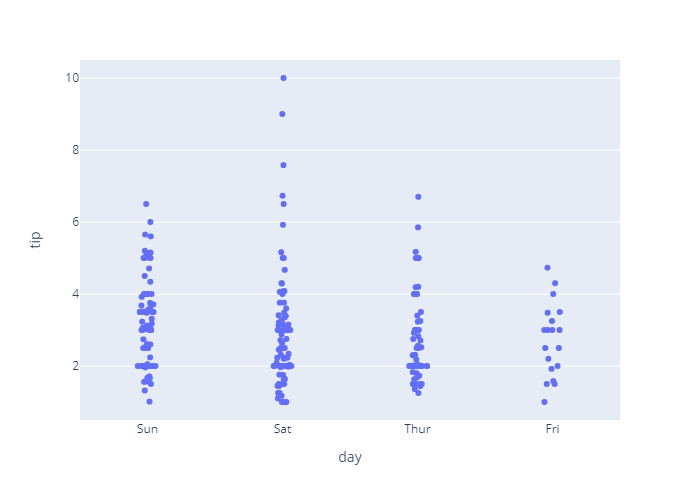

In [7]:
import plotly.express as px
px.strip(px.data.tips(), x='day', y='tip')

## Grid search visualization

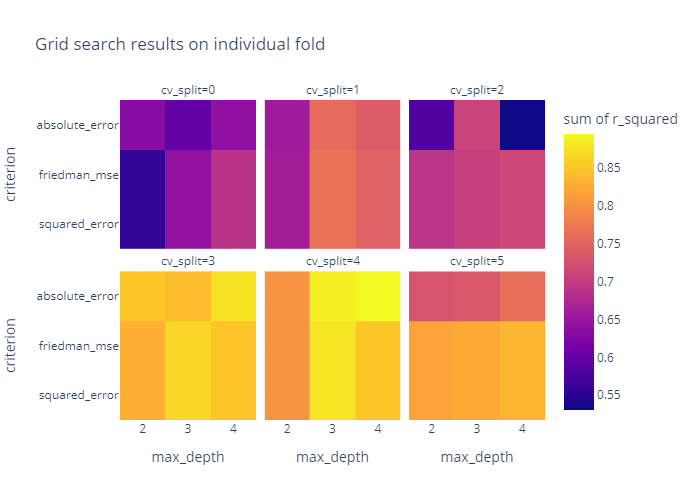

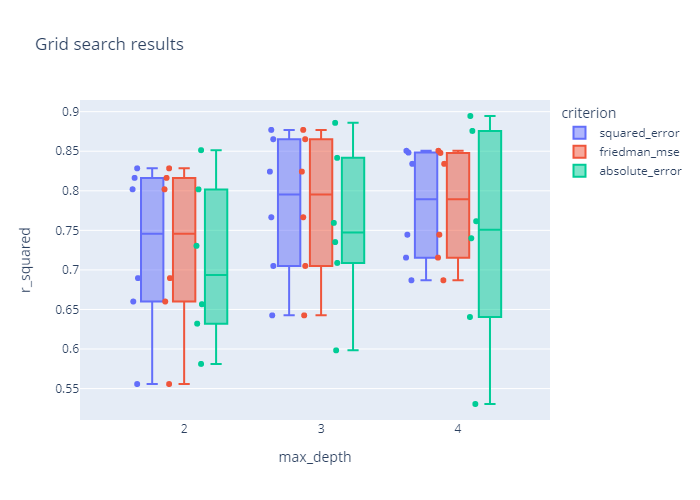

In [8]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

N_FOLD = 6

# Load and shuffle dataframe
df = px.data.iris()
df = df.sample(frac=1, random_state=0)

X = df[['sepal_width', 'sepal_length']]
y = df['petal_width']

# Define and fit the grid
model = DecisionTreeRegressor()
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': range(2, 5)
}
grid = GridSearchCV(model, param_grid, cv=N_FOLD)
grid.fit(X, y)
grid_df = pd.DataFrame(grid.cv_results_)

# Convert the wide format of the grid into the long format
# accepted by plotly.express
melted = (
    grid_df
    .rename(columns=lambda col: col.replace('param_', ''))
    .melt(
        value_vars=[f'split{i}_test_score' for i in range(N_FOLD)],
        id_vars=['mean_test_score', 'mean_fit_time', 'criterion', 'max_depth'],
        var_name="cv_split",
        value_name="r_squared"
    )
)

# Format the variable names for simplicity
melted['cv_split'] = (
    melted['cv_split']
    .str.replace('_test_score', '')
    .str.replace('split', '')
)

# Single function call to plot each figure
fig_hmap = px.density_heatmap(
    melted, x="max_depth", y='criterion',
    histfunc="sum", z="r_squared",
    title='Grid search results on individual fold',
    hover_data=['mean_fit_time'],
    facet_col="cv_split", facet_col_wrap=3,
    labels={'mean_test_score': "mean_r_squared"}
)

fig_box = px.box(
    melted, x='max_depth', y='r_squared',
    title='Grid search results ',
    hover_data=['mean_fit_time'],
    points='all',
    color="criterion",
    hover_name='cv_split',
    labels={'mean_test_score': "mean_r_squared"}
)

# Display
fig_hmap.show()
fig_box.show()